In [61]:
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier


In [76]:

# Loading the dataset
var = 'symptomsupdate'
base_path = r'C:\Users\My PC\OneDrive\Documents'
full_path = os.path.join(base_path, var + '.csv')
symptoms = pd.read_csv(full_path)
df = pd.DataFrame(symptoms)

# Data cleaning
df = df.map(lambda x: x.strip().lower() if isinstance(x, str) else x)
df = df.replace({'yes': 1, 'no': 0, 'negative': 0, 'positive': 1})
pd.set_option('future.no_silent_downcasting', True)  
df = df.fillna(0).astype(int) 

# Preparing features and target
X = df.drop('TB', axis=1)
y = df['TB']
df.head()


,chronic_cough,Fever_chills,weightloss,\tFeeling_tired,coughing_blood,Night_sweats,Appetite_loss,Extreme_weakness,Age,TB
0,1,1,1,1,0,1,1,1,27,0
1,1,1,0,0,0,1,1,0,70,0
2,1,0,0,1,0,1,1,0,24,0
3,1,0,1,1,0,1,0,1,26,0
4,1,1,1,1,0,1,1,0,60,0


In [65]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)


In [66]:
# Random seeds set for reproducibility
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=20)
X, y = smote.fit_resample(X, y)

# Defining and compiling the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(16, activation='relu'))
# Another dropout layer for regularization
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

C:\Users\My PC\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7256 - loss: 0.6080 - val_accuracy: 0.8000 - val_loss: 0.5091
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7402 - loss: 0.5779 - val_accuracy: 0.8000 - val_loss: 0.5052
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7624 - loss: 0.5815 - val_accuracy: 0.8000 - val_loss: 0.5031
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7602 - loss: 0.5642 - val_accuracy: 0.8000 - val_loss: 0.5025
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7670 - loss: 0.5577 - val_accuracy: 0.8000 - val_loss: 0.5034
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7848 - loss: 0.5446 - val_accuracy: 0.8000 - val_loss: 0.5039
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7889 - loss: 0.5495 - val_accuracy: 0.8000 - val_loss: 0.5048
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7864 - loss: 0.5315 - val_accuracy: 0.

C:\Users\My PC\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\My PC\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\My PC\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate sensitivity (recall, true positive rate)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.00
Specificity: 1.00


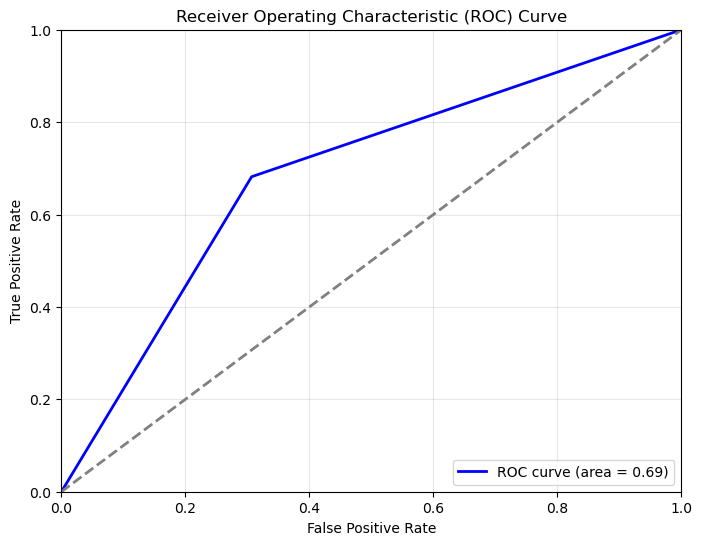

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [72]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)
# Handle class imbalance using a combination of SMOTE and under-sampling
smote_enn = SMOTEENN(random_state=20)
X, y = smote_enn.fit_resample(X, y)
# Calculate class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


In [73]:

# Use Random Forest Classifier with class weights
clf = RandomForestClassifier(n_estimators=100, random_state=20, class_weight=class_weights_dict)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        88
           1       0.73      0.69      0.71        88

    accuracy                           0.72       176
   macro avg       0.72      0.72      0.72       176
weighted avg       0.72      0.72      0.72       176

ROC-AUC Score: 0.7159090909090909
Confusion Matrix:
[[65 23]
 [27 61]]


In [74]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate sensitivity (recall, true positive rate)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.69
Specificity: 0.74


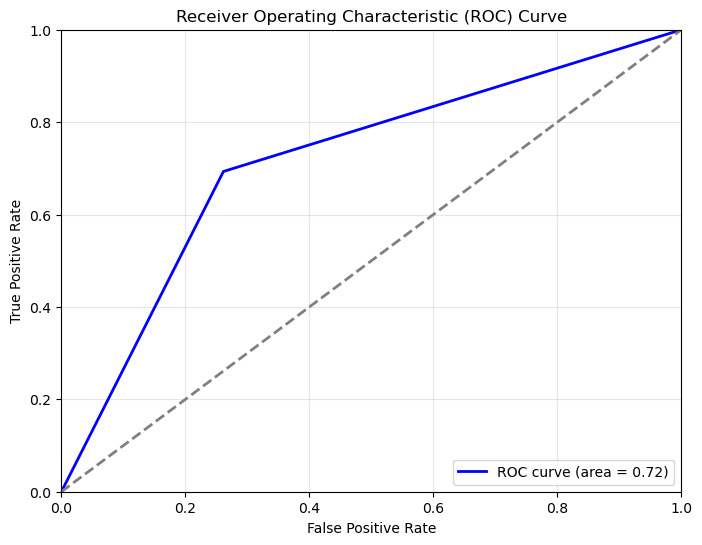

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()